# Molecular Property Predictor using Graph Neural Networks

## Installing Dependencies



*   Pytorch Geometric -> For GNN and dataset
*   rdkit -> For molecule visualisation




In [ ]:
#@title
# Check pytorch version and make sure you use a GPU Kernel
!python -c "import torch; print(torch.__version__)"
!python -c "import torch; print(torch.version.cuda)"
!python --version
!nvidia-smi

1.8.1+cu101
10.1
Python 3.7.10
Sat Apr 24 12:40:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                         

In [ ]:
#@title
# #@title
# #@title
# # Install rdkit
# import sys
# import os
# import requests
# import subprocess
# import shutil
# from logging import getLogger, StreamHandler, INFO


# logger = getLogger(__name__)
# logger.addHandler(StreamHandler())
# logger.setLevel(INFO)


# def install(
#         chunk_size=4096,
#         file_name="Miniconda3-latest-Linux-x86_64.sh",
#         url_base="https://repo.continuum.io/miniconda/",
#         conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
#         rdkit_version=None,
#         add_python_path=True,
#         force=False):
#     """install rdkit from miniconda
#     ```
#     import rdkit_installer
#     rdkit_installer.install()
#     ```
#     """

#     python_path = os.path.join(
#         conda_path,
#         "lib",
#         "python{0}.{1}".format(*sys.version_info),
#         "site-packages",
#     )

#     if add_python_path and python_path not in sys.path:
#         logger.info("add {} to PYTHONPATH".format(python_path))
#         sys.path.append(python_path)

#     if os.path.isdir(os.path.join(python_path, "rdkit")):
#         logger.info("rdkit is already installed")
#         if not force:
#             return

#         logger.info("force re-install")

#     url = url_base + file_name
#     python_version = "{0}.{1}.{2}".format(*sys.version_info)

#     logger.info("python version: {}".format(python_version))

#     if os.path.isdir(conda_path):
#         logger.warning("remove current miniconda")
#         shutil.rmtree(conda_path)
#     elif os.path.isfile(conda_path):
#         logger.warning("remove {}".format(conda_path))
#         os.remove(conda_path)

#     logger.info('fetching installer from {}'.format(url))
#     res = requests.get(url, stream=True)
#     res.raise_for_status()
#     with open(file_name, 'wb') as f:
#         for chunk in res.iter_content(chunk_size):
#             f.write(chunk)
#     logger.info('done')

#     logger.info('installing miniconda to {}'.format(conda_path))
#     subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
#     logger.info('done')

#     logger.info("installing rdkit")
#     subprocess.check_call([
#         os.path.join(conda_path, "bin", "conda"),
#         "install",
#         "--yes",
#         "-c", "rdkit",
#         "python=={}".format(python_version),
#         "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
#     logger.info("done")

#     import rdkit
#     logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


# if __name__ == "__main__":
#     install()

# %%bash
# wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
# chmod +x Miniconda3-latest-Linux-x86_64.sh
# ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
# conda config --set always_yes yes --set changeps1 no
# conda install -q -y -c conda-forge python=3.7
# conda install -q -y -c conda-forge rdkit==2020.09.2

!pip install kora -q
import kora.install.rdkit

     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 


In [ ]:
#@title
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

try:
  from rdkit import Chem
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

In [ ]:
#@title
# If this breaks, you might want to change the CUDA version displayed above (make sure the Pytorch version installed matches the installs here)
 
# Torch should already be installed
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 2.6MB 20.8MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 1.5MB 25.6MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 1.0MB 25.6MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 389kB 17.8MB/s 
     |████████████████████████████████| 215kB 16.1MB/s 
     |████████████████████████████████| 235kB 37.3MB/s 
     |████████████████████████████████| 2.2MB 56.5MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.7.0-cp37-none-any.whl size=365386 sha256=1f11715fa50cf345e9304bb0827c29411f53439c00a27c9a1ad0494b9c114c0f
  Stored in directory: /root/.cache/pip/wheels/ce/fb/df/37cd43d1433e65b2d3417a714384

## Loading MoleculeNet Physical Chemistry datasets from Pytorch

In [ ]:
from torch_geometric.datasets import MoleculeNet

class MoleculeNel():

    url = 'https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/{}'

    names = {
        'esol': ['ESOL', 'delaney-processed.csv', 'delaney-processed', -1, -2],
        'freesolv': ['FreeSolv', 'SAMPL.csv', 'SAMPL', 1, 2],
        'lipo': ['Lipophilicity', 'Lipophilicity.csv', 'Lipophilicity', 2, 1],
    }

    def __init__(self, root, name, transform=None, pre_transform=None,
                 pre_filter=None):

        if Chem is None:
            raise ImportError('`MoleculeNet` requires `rdkit`.')

        self.name = name.lower()
        assert self.name in self.names.keys()
        super(MoleculeNet, self).__init__(root, transform, pre_transform,
                                          pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_dir(self):
        return osp.join(self.root, self.name, 'raw')

    @property
    def processed_dir(self):
        return osp.join(self.root, self.name, 'processed')

    @property
    def raw_file_names(self):
        return f'{self.names[self.name][2]}.csv'

    @property
    def processed_file_names(self):
        return 'data.pt'

    def download(self):
        url = self.url.format(self.names[self.name][1])
        path = download_url(url, self.raw_dir)
        if self.names[self.name][1][-2:] == 'gz':
            extract_gz(path, self.raw_dir)
            os.unlink(path)

    def process(self):
        with open(self.raw_paths[0], 'r') as f:
            dataset = f.read().split('\n')[1:-1]
            dataset = [x for x in dataset if len(x) > 0]  

        data_list = []
        for line in dataset:
            line = re.sub(r'\".*\"', '', line)  
            line = line.split(',')

            smiles = line[self.names[self.name][3]]
            ys = line[self.names[self.name][4]]
            ys = ys if isinstance(ys, list) else [ys]

            ys = [float(y) if len(y) > 0 else float('NaN') for y in ys]
            y = torch.tensor(ys, dtype=torch.float).view(1, -1)

            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                continue

            xs = []
            for atom in mol.GetAtoms():
                x = []
                x.append(x_map['atomic_num'].index(atom.GetAtomicNum()))
                x.append(x_map['chirality'].index(str(atom.GetChiralTag())))
                x.append(x_map['degree'].index(atom.GetTotalDegree()))
                x.append(x_map['formal_charge'].index(atom.GetFormalCharge()))
                x.append(x_map['num_hs'].index(atom.GetTotalNumHs()))
                x.append(x_map['num_radical_electrons'].index(
                    atom.GetNumRadicalElectrons()))
                x.append(x_map['hybridization'].index(
                    str(atom.GetHybridization())))
                x.append(x_map['is_aromatic'].index(atom.GetIsAromatic()))
                x.append(x_map['is_in_ring'].index(atom.IsInRing()))
                xs.append(x)

            x = torch.tensor(xs, dtype=torch.long).view(-1, 9)

            edge_indices, edge_attrs = [], []
            for bond in mol.GetBonds():
                i = bond.GetBeginAtomIdx()
                j = bond.GetEndAtomIdx()

                e = []
                e.append(e_map['bond_type'].index(str(bond.GetBondType())))
                e.append(e_map['stereo'].index(str(bond.GetStereo())))
                e.append(e_map['is_conjugated'].index(bond.GetIsConjugated()))

                edge_indices += [[i, j], [j, i]]
                edge_attrs += [e, e]

            edge_index = torch.tensor(edge_indices)
            edge_index = edge_index.t().to(torch.long).view(2, -1)
            edge_attr = torch.tensor(edge_attrs, dtype=torch.long).view(-1, 3)

            # Sort indices.
            if edge_index.numel() > 0:
                perm = (edge_index[0] * x.size(0) + edge_index[1]).argsort()
                edge_index, edge_attr = edge_index[:, perm], edge_attr[perm]

            data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y,
                        smiles=smiles)

            if self.pre_filter is not None and not self.pre_filter(data):
                continue

            if self.pre_transform is not None:
                data = self.pre_transform(data)

            data_list.append(data)

        torch.save(self.collate(data_list), self.processed_paths[0])

    def __repr__(self):
        return '{}({})'.format(self.names[self.name][0], len(self))

# Load the datasets
data1 = MoleculeNet(root=".", name="ESOL")
data2 = MoleculeNet(root=".", name="FreeSolv")
data3 = MoleculeNet(root=".", name="Lipo")

Processing...
Done!
Processing...
Done!
Processing...
Done!


## Analysing the different fields in the 'data' variables

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  1
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(edge_attr=[68, 3], edge_index=[2, 68], smiles="OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ", x=[32, 9], y=[1, 1])
Sample  nodes:  32
Sample  edges:  68


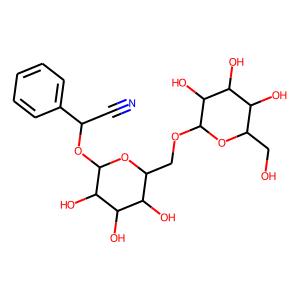

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# Analysing the ESOL dataset
print("Dataset type: ", type(data1))
print("Dataset features: ", data1.num_features)
print("Dataset target: ", data1.num_classes)
print("Dataset length: ", data1.len)
print("Dataset sample: ", data1[0])
print("Sample  nodes: ", data1[0].num_nodes)
print("Sample  edges: ", data1[0].num_edges)
molecule1 = Chem.MolFromSmiles(data1[0]["smiles"])
Draw.MolToImage(molecule1)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  1
Dataset length:  <bound method InMemoryDataset.len of FreeSolv(642)>
Dataset sample:  Data(edge_attr=[26, 3], edge_index=[2, 26], smiles="CN(C)C(=O)c1ccc(cc1)OC", x=[13, 9], y=[1, 1])
Sample  nodes:  13
Sample  edges:  26


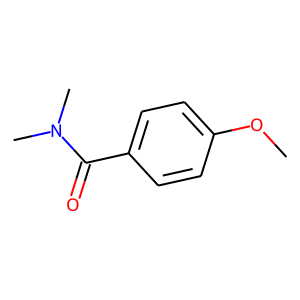

In [ ]:
# Analysing the FreeSolv dataset
print("Dataset type: ", type(data2))
print("Dataset features: ", data2.num_features)
print("Dataset target: ", data2.num_classes)
print("Dataset length: ", data2.len)
print("Dataset sample: ", data2[0])
print("Sample  nodes: ", data2[0].num_nodes)
print("Sample  edges: ", data2[0].num_edges)
molecule2 = Chem.MolFromSmiles(data2[0]["smiles"])
Draw.MolToImage(molecule2)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  1
Dataset length:  <bound method InMemoryDataset.len of Lipophilicity(4200)>
Dataset sample:  Data(edge_attr=[54, 3], edge_index=[2, 54], smiles="Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14", x=[24, 9], y=[1, 1])
Sample  nodes:  24
Sample  edges:  54


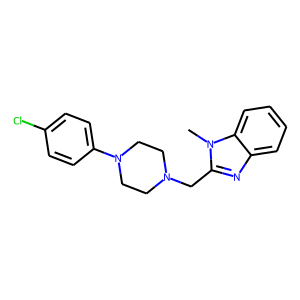

In [ ]:
# Analysing the Lipophilicity dataset
print("Dataset type: ", type(data3))
print("Dataset features: ", data3.num_features)
print("Dataset target: ", data3.num_classes)
print("Dataset length: ", data3.len)
print("Dataset sample: ", data3[0])
print("Sample  nodes: ", data3[0].num_nodes)
print("Sample  edges: ", data3[0].num_edges)
molecule3 = Chem.MolFromSmiles(data3[0]["smiles"])
Draw.MolToImage(molecule3)

## Building the GNN Model

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch.nn.functional as F 
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

hiddenLayerSize = 64
dataFeaturesSize = 9
outputSize = 1

class GNN(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GNN, self).__init__()
        torch.manual_seed(50) 

        # Convulational layers
        self.firstLayer = GCNConv(dataFeaturesSize, hiddenLayerSize)
        self.secondLayer = GCNConv(hiddenLayerSize, hiddenLayerSize)
        self.thirdLayer = GCNConv(hiddenLayerSize, hiddenLayerSize)
        self.fourthLayer = GCNConv(hiddenLayerSize, hiddenLayerSize)
        self.fifthLayer = GCNConv(hiddenLayerSize, hiddenLayerSize)

        # # Two Linear Output layers
        # self.LinearLayer1 = Linear(hiddenLayerSize*2, hiddenLayerSize)
        # self.LinearLayer2 = Linear(hiddenLayerSize, outputSize)

        # One Linear Output layers
        self.LinearLayer1 = Linear(hiddenLayerSize*2, 1)

    def forward(self, x, edge_index, batch_index):

        # Convulational layers
        hidden = self.firstLayer(x, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.secondLayer(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.thirdLayer(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.fourthLayer(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.fifthLayer(hidden, edge_index)
        hidden = F.tanh(hidden)
          
        # Global Pooling Layers
        hidden = torch.cat([gmp(hidden, batch_index), gap(hidden, batch_index)], dim=1)

        # # Adding two linear layers for Linear Regression 
        # hidden = self.LinearLayer1(hidden)
        # output = self.LinearLayer2(hidden)

        # Adding a linear layer for Linear Regression 
        output = self.LinearLayer1(hidden)

        return output, hidden

model = GNN()
print(model)

GNN(
  (firstLayer): GCNConv(9, 64)
  (secondLayer): GCNConv(64, 64)
  (thirdLayer): GCNConv(64, 64)
  (fourthLayer): GCNConv(64, 64)
  (fifthLayer): GCNConv(64, 64)
  (LinearLayer1): Linear(in_features=128, out_features=1, bias=True)
)


## Training the GNN Model

In [ ]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Defining the loss function and optimizer
lossFunction = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def trainModel(traindata):
  for eachBatch in traindata:
    # Using GPU
    eachBatch.to(device)

    # Passing data into model
    prediction, hiddenLayers = model(eachBatch.x.float(), eachBatch.edge_index, eachBatch.batch)

    # Calculating loss
    loss = torch.sqrt(lossFunction(prediction, eachBatch.y))
    loss.backward()

    # Next Step
    optimizer.step()
    optimizer.zero_grad()

  return loss, hiddenLayers

#### Training

Starting to train the model
Epoch 0 | Train Loss 4.234798908233643
Epoch 100 | Train Loss 0.7794235348701477
Epoch 200 | Train Loss 0.5335632562637329
Epoch 300 | Train Loss 0.1921600103378296
Epoch 400 | Train Loss 0.1743871569633484
Epoch 500 | Train Loss 0.18975752592086792
Epoch 600 | Train Loss 0.596881091594696
Epoch 700 | Train Loss 0.19160884618759155
Epoch 800 | Train Loss 0.3072303235530853
Epoch 900 | Train Loss 0.18566438555717468
Epoch 1000 | Train Loss 0.26889392733573914
Epoch 1100 | Train Loss 0.3681156039237976
Epoch 1200 | Train Loss 0.2121446579694748
Epoch 1300 | Train Loss 0.1482149213552475
Epoch 1400 | Train Loss 0.17701683938503265
Epoch 1500 | Train Loss 0.12602554261684418
Epoch 1600 | Train Loss 0.2209085375070572
Epoch 1700 | Train Loss 0.09698738157749176
Epoch 1800 | Train Loss 0.25308436155319214
Epoch 1900 | Train Loss 0.12885743379592896
Epoch 2000 | Train Loss 0.07048457860946655
Epoch 2100 | Train Loss 0.17161811888217926
Epoch 2200 | Train Loss 0.182

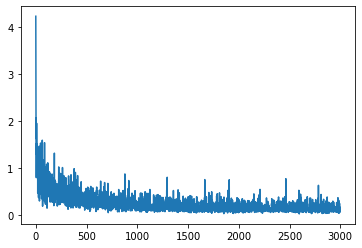

In [ ]:
batchSize = 64

# Setting which dataset to load
datasetToLoad = data1

train = DataLoader(datasetToLoad[:int(len(datasetToLoad) * 0.8)], 
                    batch_size=batchSize, shuffle=True)
test = DataLoader(datasetToLoad[int(len(datasetToLoad) * 0.8):], 
                    batch_size=batchSize, shuffle=True)

print("Starting to train the model")

losses = []

for epoch in range(3000):
  loss, h = trainModel(train)
  losses.append(loss)

  if epoch % 100 == 0:
    print(f"Epoch {epoch} | Train Loss {loss}")

import seaborn as sns

losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(loss_indices, losses_float)
plt

#### Predicting


In [ ]:
import pandas as pd 
1
# Analyze the results
testBatch = next(iter(test))
testBatch2 = next(iter(test))
#testBatch = test

with torch.no_grad():
    testBatch.to(device)
    pred, embed = model(testBatch.x.float(), testBatch.edge_index, testBatch.batch) 
    df = pd.DataFrame()
    df["y_real"] = testBatch.y.tolist()
    df["y_pred"] = pred.tolist()

df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])

with torch.no_grad():
    testBatch2.to(device)
    pred2, embed2 = model(testBatch2.x.float(), testBatch2.edge_index, testBatch2.batch) 
    df2 = pd.DataFrame()
    df2["y_real"] = testBatch2.y.tolist()
    df2["y_pred"] = pred2.tolist()

df2["y_real"] = df2["y_real"].apply(lambda row: row[0])
df2["y_pred"] = df2["y_pred"].apply(lambda row: row[0])

df.append(df2)

,y_real,y_pred
0,-4.89,-4.064800
1,-3.24,-3.551354
2,-2.12,-1.955563
3,-4.57,-5.284811
4,-6.80,-7.409152
...,...,...
59,-0.31,-2.519231
60,-3.76,-5.155268
61,-6.35,-6.035748
62,-0.59,-0.752655


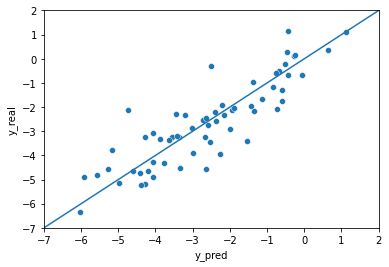

In [ ]:
plt = sns.scatterplot(data=df, x="y_pred", y="y_real")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt.plot([0,1],[0,1], transform=plt.transAxes)
plt